# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Data Preparation

In [2]:
heart_df = pd.read_csv('.\Medicaldataset.csv')
heart_df.head(5)

,Age,Gender,HeartRate,SBP,DBP,BloodSugar,CKMB,Troponin,Result
0,45,1,1111,141,95,109.0,1.33,1.010,positive
1,70,0,1111,141,95,138.0,3.87,0.028,positive
2,32,0,1111,141,95,82.0,2.66,0.008,negative
3,48,1,135,98,60,100.0,94.79,0.004,positive
4,68,1,135,98,60,96.0,254.40,0.025,positive


### Observation:
The dataset is used to predict whether a patient is likely to suffer from a heart stroke based on 8 features:
- Age: Age of the patient.

- Gender: Male is 1; Female is 0.

- HeartRate: The speed at which the heart beats.

- SBP: Measures the pressure in arteries when the heart beats (NHS Choices, 2023).

- DBP: Measures the pressure in arteries when the heart rests between beats (NHS Choices, 2023).

- Blood Sugar: Measure of glucose concentrated in the blood.

- CKMB: An enzyme that is found primarily in heart muscle cells. Its levels in the blood can be used to help diagnose a heart attack or other damage to the heart (Rahul Kurapati and Soos, 2022).

- Troponin: As heart damage increases, greater amounts of troponin are released in the blood. High levels of troponin in the blood may indicate that the person is having or recently had a heart attack.

- Result: Whether or not the patient has suffered from a heart attack or not.

There are 9 columns in total.



# Analysing Data

In [3]:
heart_df.describe(include='all')

,Age,Gender,HeartRate,SBP,DBP,BloodSugar,CKMB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,NaN
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,NaN
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,NaN
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,NaN
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,NaN
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,NaN


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1319 non-null   int64  
 1   Gender      1319 non-null   int64  
 2   HeartRate   1319 non-null   int64  
 3   SBP         1319 non-null   int64  
 4   DBP         1319 non-null   int64  
 5   BloodSugar  1319 non-null   float64
 6   CKMB        1319 non-null   float64
 7   Troponin    1319 non-null   float64
 8   Result      1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


### Observation:
- There are no non-numerical columns in the dataset except for 'Result'. We will come back to this.

- There are no missing or NULL values in the dataset. 

Let's investigate this further after a bit more analysis.

C:\Users\alisu\AppData\Local\Temp\ipykernel_1868\3008907626.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


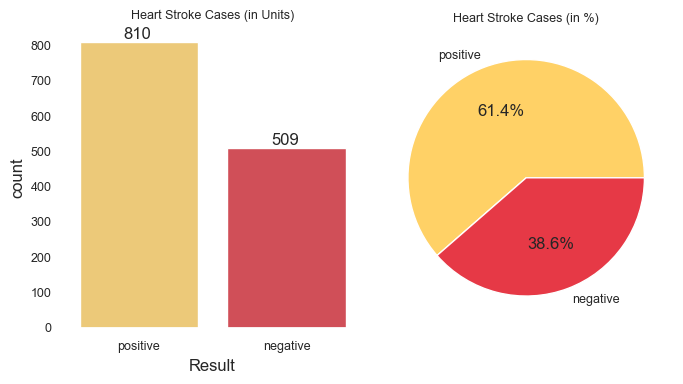

In [5]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':9,'ytick.labelsize':9, 'figure.autolayout':True})
my_col = ('#FFD166', '#E63946')
plt.subplots(figsize=(7,4))

## Heart Stroke Cases (in Units)

plt.subplot(1,2,1)
plt.title('Heart Stroke Cases (in Units)', fontdict={'fontsize':9})
ax = sns.countplot(x="Result", data=heart_df, palette=my_col, order=heart_df['Result'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+8))

## Heart Stroke Cases (in %)

plt.subplot(1,2,2)
plt.title('Heart Stroke Cases (in %)', fontdict={'fontsize':9})
heart_df['Result'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

plt.show()

### Observation:
- There appears to be an imbalance between positive and negative cases.

- The number of heart stroke cases represent just under 40% of total cases. 

C:\Users\alisu\AppData\Local\Temp\ipykernel_1868\2412611459.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


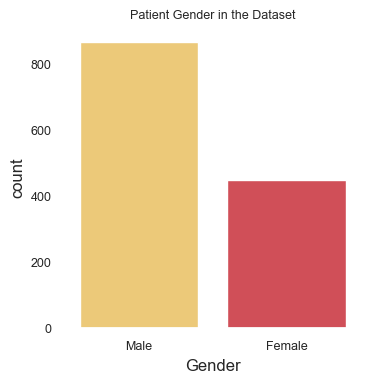

In [6]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':9,'ytick.labelsize':9, 'figure.autolayout':True})
my_col = ('#FFD166', '#E63946')
plt.subplots(figsize=(7,4))

# Gender
plt.subplot(1,2,1)
plt.title('Patient Gender in the Dataset', fontdict={'fontsize':9})
ax = sns.countplot(x="Gender", data=heart_df, palette=my_col, order=heart_df['Gender'].value_counts().index)
ax.set_xticklabels(["Male", "Female"])

plt.show()

### Observation:
- There seems to be a significant gender imbalance in the dataset.

- The number of male patients in the dataset is more than twice that of female patients, with over 800 and 400 cases, respectively.

In [7]:
print("Duplicate values in Heart Dataset:", heart_df.duplicated().sum())
zero_counts = ['Age','Gender',"HeartRate",'SBP', 
               'DBP', 'BloodSugar', 'CKMB', 'Troponin', 
               ]
total_count = heart_df.shape[0]

for feature in zero_counts:
    zero_count = heart_df[heart_df[feature]==0][feature].count()
    print('Zeros in {0}: {1}, Percentage: {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Duplicate values in Heart Dataset: 0
Zeros in Age: 0, Percentage: 0.00%
Zeros in Gender: 449, Percentage: 34.04%
Zeros in HeartRate: 0, Percentage: 0.00%
Zeros in SBP: 0, Percentage: 0.00%
Zeros in DBP: 0, Percentage: 0.00%
Zeros in BloodSugar: 0, Percentage: 0.00%
Zeros in CKMB: 0, Percentage: 0.00%
Zeros in Troponin: 0, Percentage: 0.00%


### Observations:
- There are no duplicate values in the dataset.

- No zero values in the dataset which is good.

In [8]:
for col in heart_df.columns:
    if heart_df[col].dtype == 'object':
        print("\n", col, "\n", heart_df[col].unique()) 


 Result 
 ['positive' 'negative']


We have to  convert the Result into an integer boolean value. This will be done later.

# Preprocessing Data

Let's have a better understanding of the data.

In [9]:
heart_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1319.0,NaN,NaN,NaN,56.191812,13.647315,14.0,47.0,58.0,65.0,103.0
Gender,1319.0,NaN,NaN,NaN,0.659591,0.474027,0.0,0.0,1.0,1.0,1.0
HeartRate,1319.0,NaN,NaN,NaN,78.336619,51.63027,20.0,64.0,74.0,85.0,1111.0
SBP,1319.0,NaN,NaN,NaN,127.170584,26.12272,42.0,110.0,124.0,143.0,223.0
DBP,1319.0,NaN,NaN,NaN,72.269143,14.033924,38.0,62.0,72.0,81.0,154.0
BloodSugar,1319.0,NaN,NaN,NaN,146.634344,74.923045,35.0,98.0,116.0,169.5,541.0
CKMB,1319.0,NaN,NaN,NaN,15.274306,46.327083,0.321,1.655,2.85,5.805,300.0
Troponin,1319.0,NaN,NaN,NaN,0.360942,1.154568,0.001,0.006,0.014,0.0855,10.3
Result,1319,2,positive,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Detecting Outliers using Histogram and Box & Whisker

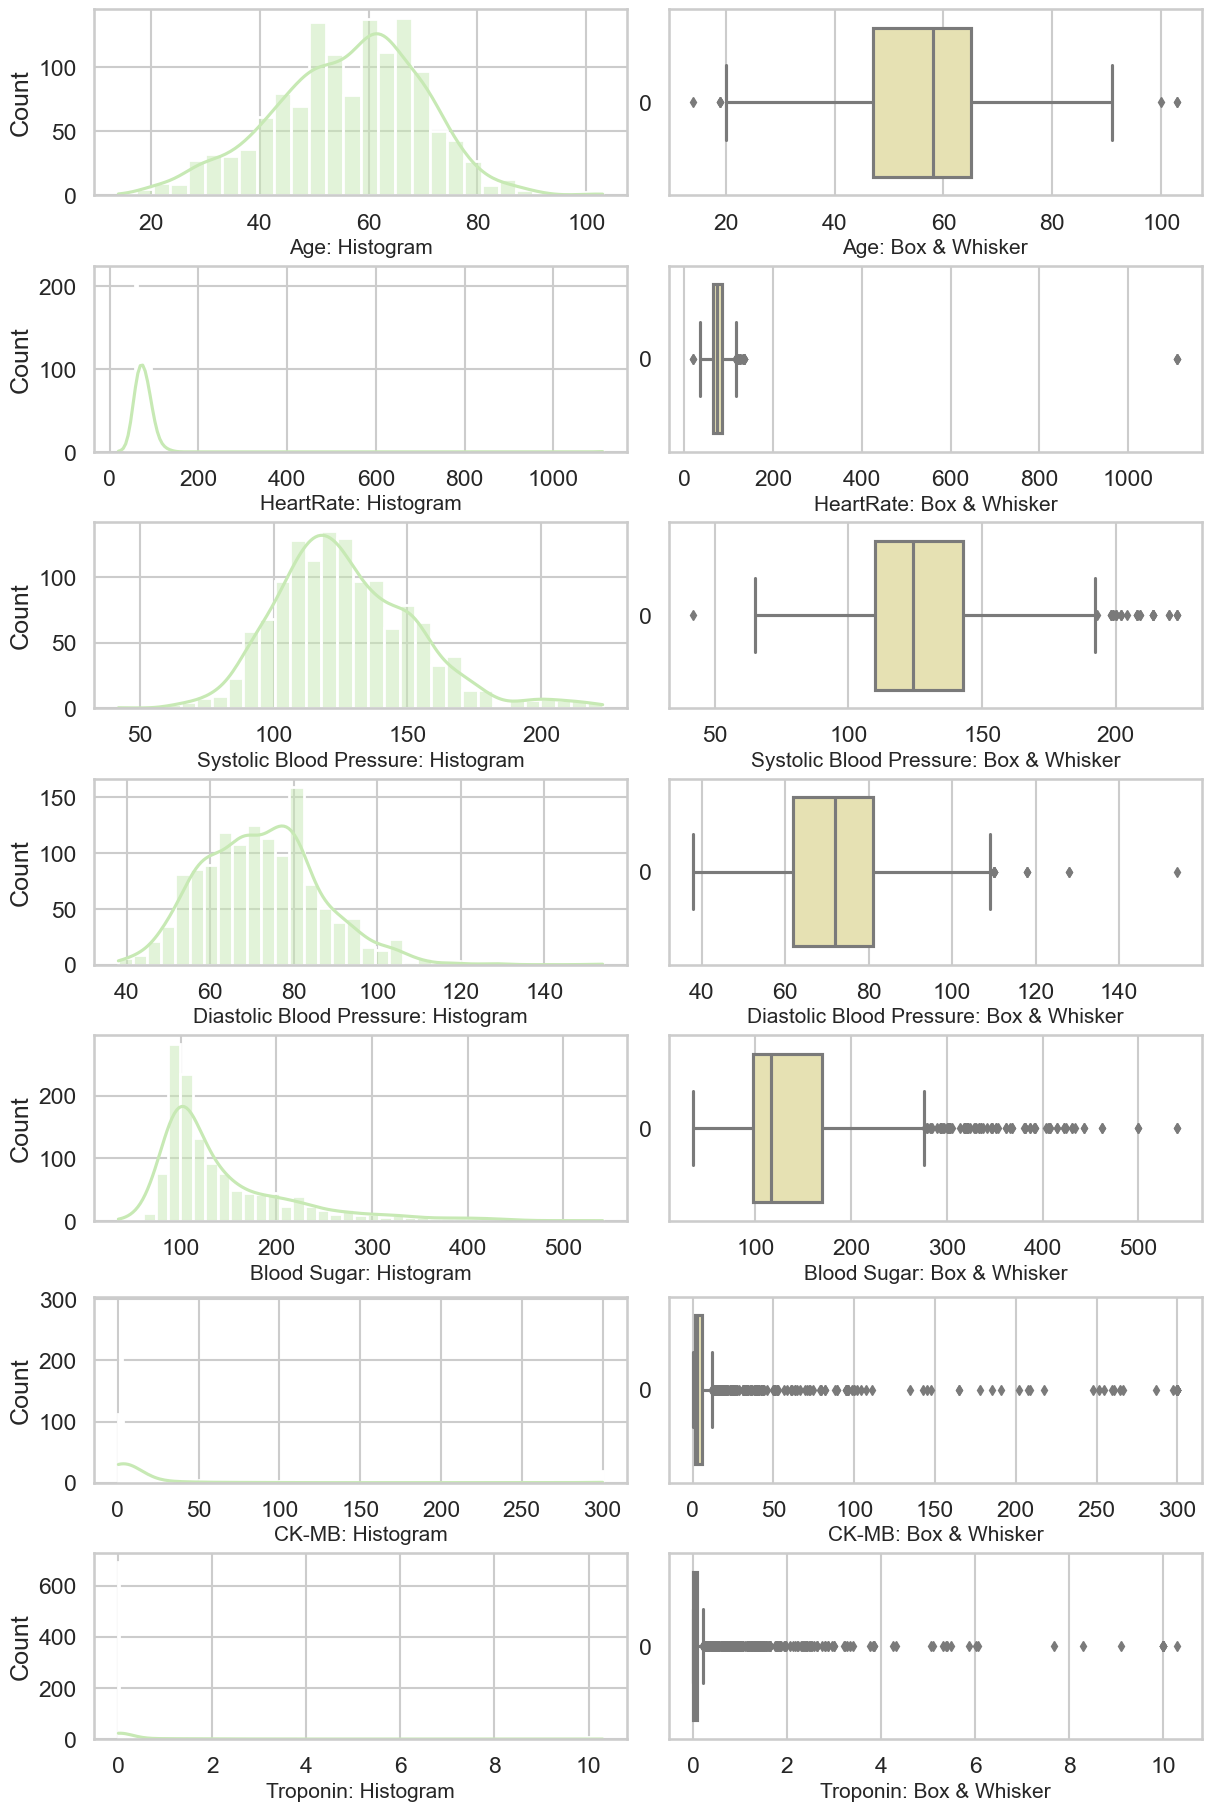

In [10]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('pastel')

fig, axs = plt.subplots(7, 2, figsize=(12, 18), constrained_layout=True)

# Age of the Individual: Histogram
sns.histplot(heart_df.Age, color='#c7e9b4', kde=True, linewidth=2, ax=axs[0, 0])
axs[0, 0].set_xlabel('Age: Histogram', fontsize=15)

# Age of the Individual: Box & Whisker Plot
sns.boxplot(heart_df.Age, color='#EEE8AA', orient='h', ax=axs[0, 1])
axs[0, 1].set_xlabel('Age: Box & Whisker', fontsize=15)

# HeartRate: Histogram
sns.histplot(heart_df.HeartRate, color='#c7e9b4', kde=True, linewidth=2, ax=axs[1, 0])
axs[1, 0].set_xlabel('HeartRate: Histogram', fontsize=15)

# HeartRate: Box & Whisker Plot
sns.boxplot(heart_df.HeartRate, color='#EEE8AA', orient='h', ax=axs[1, 1])
axs[1, 1].set_xlabel('HeartRate: Box & Whisker', fontsize=15)

# Systolic Blood Pressure: Histogram
sns.histplot(heart_df.SBP, color='#c7e9b4', kde=True, linewidth=2, ax=axs[2, 0])
axs[2, 0].set_xlabel('Systolic Blood Pressure: Histogram', fontsize=15)

# Systolic Blood Pressure: Box & Whisker Plot
sns.boxplot(heart_df.SBP, color='#EEE8AA', orient='h', ax=axs[2, 1])
axs[2, 1].set_xlabel('Systolic Blood Pressure: Box & Whisker', fontsize=15)

# Diastolic Blood Pressure: Histogram
sns.histplot(heart_df.DBP, color='#c7e9b4', kde=True, linewidth=2, ax=axs[3, 0])
axs[3, 0].set_xlabel('Diastolic Blood Pressure: Histogram', fontsize=15)

# Diastolic Blood Pressure: Box & Whisker Plot
sns.boxplot(heart_df.DBP, color='#EEE8AA', orient='h', ax=axs[3, 1])
axs[3, 1].set_xlabel('Diastolic Blood Pressure: Box & Whisker', fontsize=15)

# Blood Sugar: Histogram
sns.histplot(heart_df.BloodSugar, color='#c7e9b4', kde=True, linewidth=2, ax=axs[4, 0])
axs[4, 0].set_xlabel('Blood Sugar: Histogram', fontsize=15)

# Blood Sugar: Box & Whisker Plot
sns.boxplot(heart_df.BloodSugar, color='#EEE8AA', orient='h', ax=axs[4, 1])
axs[4, 1].set_xlabel('Blood Sugar: Box & Whisker', fontsize=15)

# CK-MB: Histogram
sns.histplot(heart_df.CKMB, color='#c7e9b4', kde=True, linewidth=2, ax=axs[5, 0])
axs[5, 0].set_xlabel('CK-MB: Histogram', fontsize=15)

# CK-MB: Box & Whisker Plot
sns.boxplot(heart_df.CKMB, color='#EEE8AA', orient='h', ax=axs[5, 1])
axs[5, 1].set_xlabel('CK-MB: Box & Whisker', fontsize=15)

# Troponin: Histogram
sns.histplot(heart_df.Troponin, color='#c7e9b4', kde=True, linewidth=2, ax=axs[6, 0])
axs[6, 0].set_xlabel('Troponin: Histogram', fontsize=15)

# Troponin: Box & Whisker Plot
sns.boxplot(heart_df.Troponin, color='#EEE8AA', orient='h', ax=axs[6, 1])
axs[6, 1].set_xlabel('Troponin: Box & Whisker', fontsize=15)


# Setting title and font size for remaining subplots
for i in range(7, 2):
    axs[i, 0].set_title('', fontsize=15)
    axs[i, 1].set_title('', fontsize=15)

plt.show()

### Observation:
- All the features contain outliers. However, the number varies between them.

- There are 4 outliers in the Age column. Let's deal with that in a bit.

- There is a HeartRate outlier that is wildly abnormal (>1000). This must be removed.

- There are a couple of outliers in SBP 7 DBP, let's also remove them.
    - Remove all outliers >450 in Blood Sugar.
    - Let's not remove any CK-MB outliers as doing so would remove a huge part of the data.
    - Remove all outliers >6 in Troponin but not all of them remember higher levels of Troponin may indicate greater chances of heart damage.

## Removing Outliers

In [11]:
drop_indexes = []
for row in range(0, heart_df.shape[0]):
    if(heart_df.values[row, 0] < 20 # Age
       or heart_df.values[row, 0] > 92 # Age
       or heart_df.values[row, 2] < 35 # HeartRate
       or heart_df.values[row, 2] > 140 # HeartRate
       or heart_df.values[row, 3] < 60 # Systoilic Blood Pressure
       or heart_df.values[row, 4] > 105 # Diastolic Blood Pressure
       or heart_df.values[row, 5] > 450 # Blood Sugar
       or heart_df.values[row, 7] > 6 # Troponin
       ):
        drop_indexes.append(row)

In [12]:
heart_df.drop(index=drop_indexes, inplace=True)
heart_df.reset_index(inplace=True)
heart_df.drop(axis=1, labels='index', inplace=True)

Good, we removed the outliers. Let's confirm it.

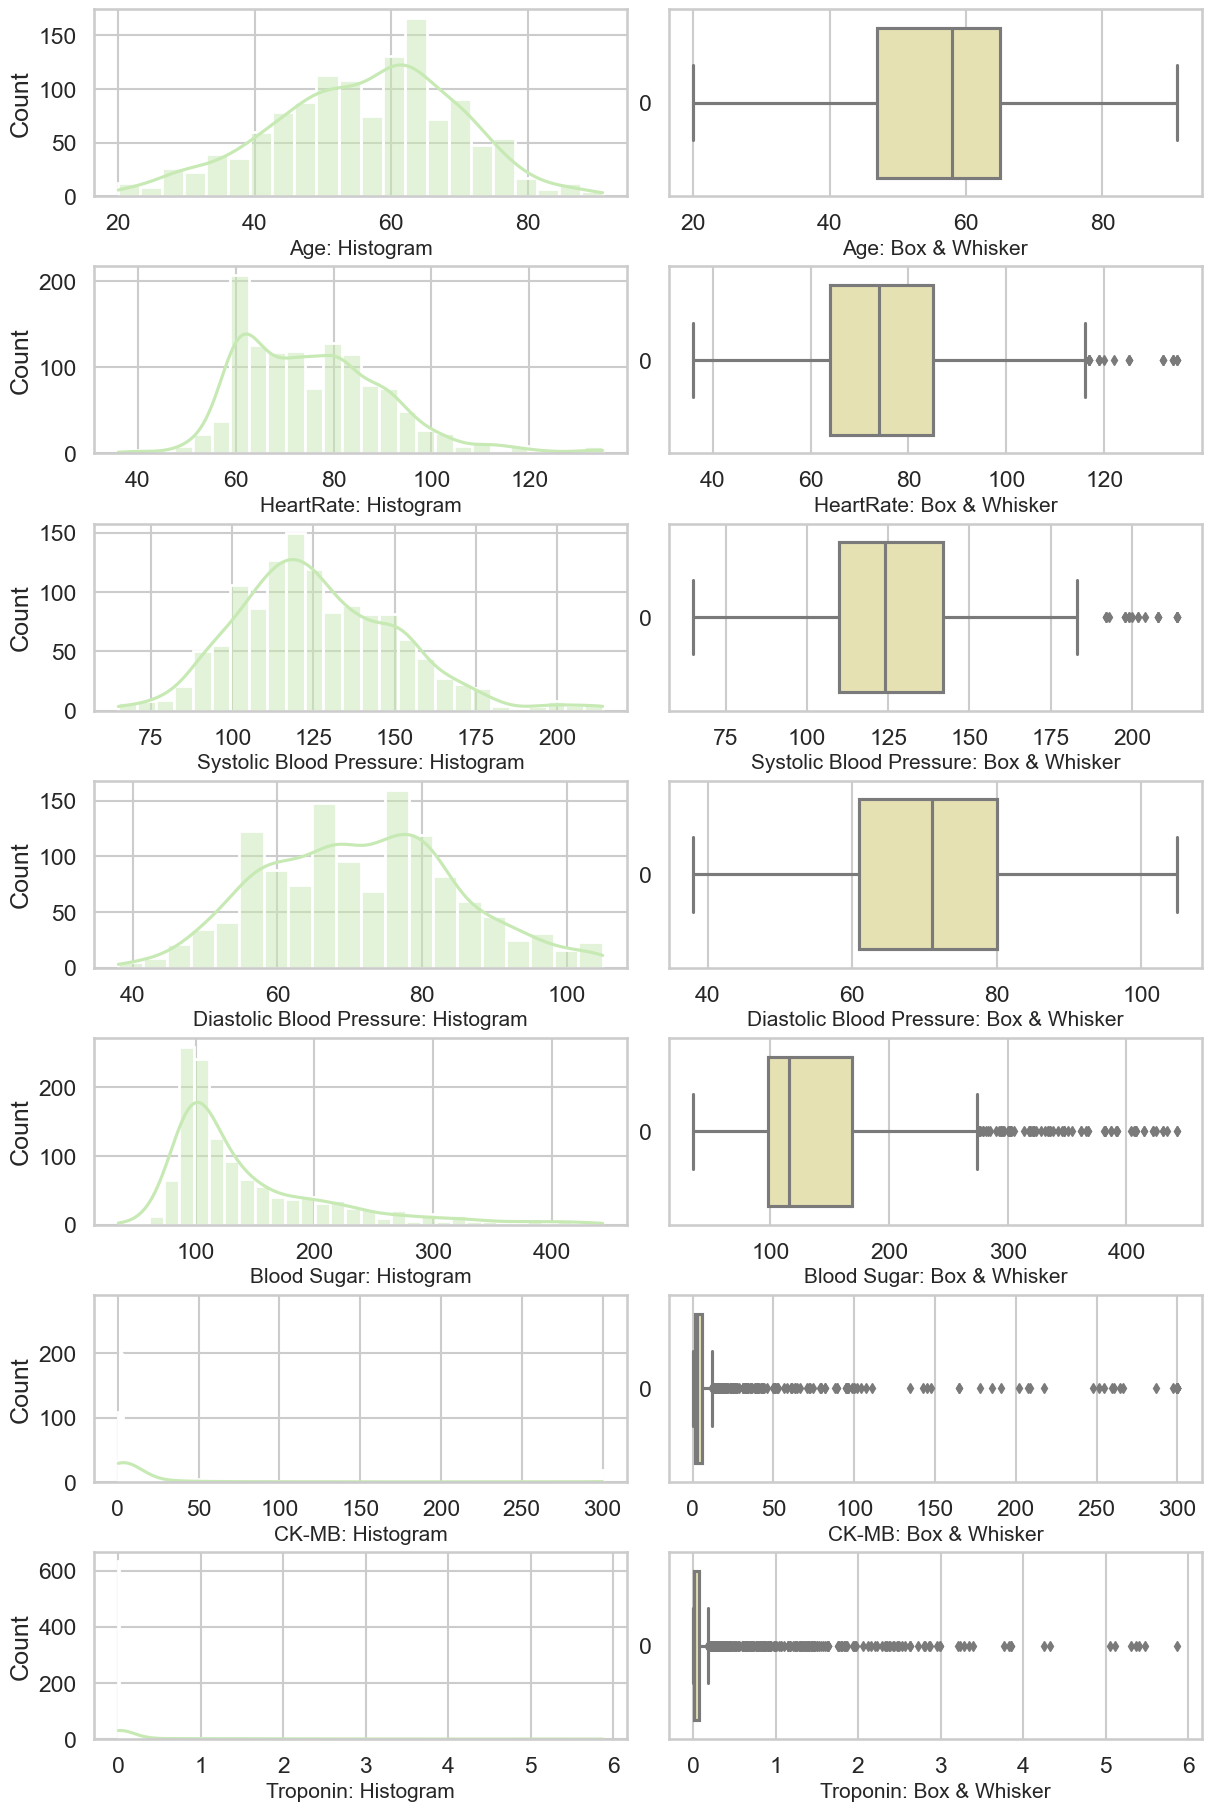

In [13]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('pastel')

fig, axs = plt.subplots(7, 2, figsize=(12, 18), constrained_layout=True)

# Age of the Individual: Histogram
sns.histplot(heart_df.Age, color='#c7e9b4', kde=True, linewidth=2, ax=axs[0, 0])
axs[0, 0].set_xlabel('Age: Histogram', fontsize=15)

# Age of the Individual: Box & Whisker Plot
sns.boxplot(heart_df.Age, color='#EEE8AA', orient='h', ax=axs[0, 1])
axs[0, 1].set_xlabel('Age: Box & Whisker', fontsize=15)

# HeartRate: Histogram
sns.histplot(heart_df.HeartRate, color='#c7e9b4', kde=True, linewidth=2, ax=axs[1, 0])
axs[1, 0].set_xlabel('HeartRate: Histogram', fontsize=15)

# HeartRate: Box & Whisker Plot
sns.boxplot(heart_df.HeartRate, color='#EEE8AA', orient='h', ax=axs[1, 1])
axs[1, 1].set_xlabel('HeartRate: Box & Whisker', fontsize=15)

# Systolic Blood Pressure: Histogram
sns.histplot(heart_df.SBP, color='#c7e9b4', kde=True, linewidth=2, ax=axs[2, 0])
axs[2, 0].set_xlabel('Systolic Blood Pressure: Histogram', fontsize=15)

# Systolic Blood Pressure: Box & Whisker Plot
sns.boxplot(heart_df.SBP, color='#EEE8AA', orient='h', ax=axs[2, 1])
axs[2, 1].set_xlabel('Systolic Blood Pressure: Box & Whisker', fontsize=15)

# Diastolic Blood Pressure: Histogram
sns.histplot(heart_df.DBP, color='#c7e9b4', kde=True, linewidth=2, ax=axs[3, 0])
axs[3, 0].set_xlabel('Diastolic Blood Pressure: Histogram', fontsize=15)

# Diastolic Blood Pressure: Box & Whisker Plot
sns.boxplot(heart_df.DBP, color='#EEE8AA', orient='h', ax=axs[3, 1])
axs[3, 1].set_xlabel('Diastolic Blood Pressure: Box & Whisker', fontsize=15)

# Blood Sugar: Histogram
sns.histplot(heart_df.BloodSugar, color='#c7e9b4', kde=True, linewidth=2, ax=axs[4, 0])
axs[4, 0].set_xlabel('Blood Sugar: Histogram', fontsize=15)

# Blood Sugar: Box & Whisker Plot
sns.boxplot(heart_df.BloodSugar, color='#EEE8AA', orient='h', ax=axs[4, 1])
axs[4, 1].set_xlabel('Blood Sugar: Box & Whisker', fontsize=15)

# CK-MB: Histogram
sns.histplot(heart_df.CKMB, color='#c7e9b4', kde=True, linewidth=2, ax=axs[5, 0])
axs[5, 0].set_xlabel('CK-MB: Histogram', fontsize=15)

# CK-MB: Box & Whisker Plot
sns.boxplot(heart_df.CKMB, color='#EEE8AA', orient='h', ax=axs[5, 1])
axs[5, 1].set_xlabel('CK-MB: Box & Whisker', fontsize=15)

# Troponin: Histogram
sns.histplot(heart_df.Troponin, color='#c7e9b4', kde=True, linewidth=2, ax=axs[6, 0])
axs[6, 0].set_xlabel('Troponin: Histogram', fontsize=15)

# Troponin: Box & Whisker Plot
sns.boxplot(heart_df.Troponin, color='#EEE8AA', orient='h', ax=axs[6, 1])
axs[6, 1].set_xlabel('Troponin: Box & Whisker', fontsize=15)


# Setting title and font size for remaining subplots
for i in range(7, 2):
    axs[i, 0].set_title('', fontsize=15)
    axs[i, 1].set_title('', fontsize=15)

plt.show()

In [14]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         1271 non-null   int64  
 1   Gender      1271 non-null   int64  
 2   HeartRate   1271 non-null   int64  
 3   SBP         1271 non-null   int64  
 4   DBP         1271 non-null   int64  
 5   BloodSugar  1271 non-null   float64
 6   CKMB        1271 non-null   float64
 7   Troponin    1271 non-null   float64
 8   Result      1271 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 89.5+ KB


48 data points have been removed. which represents less than four percent of the dataset, which is a small amount.

## 'Result' to Integer Conversion

Now let's convert the Result column into an integer (Boolean).

In [15]:
columns = ['Result']
for i in columns:
    heart_df[i] = np.where(heart_df[i] == 'positive', 1, 0)

Observe that 1 denotes positive and 0 negative for heart attack.

In [16]:
heart_df.head(5)

,Age,Gender,HeartRate,SBP,DBP,BloodSugar,CKMB,Troponin,Result
0,48,1,135,98,60,100.0,94.79,0.004,1
1,68,1,135,98,60,96.0,254.40,0.025,1
2,65,1,135,98,60,162.0,7.67,0.025,1
3,60,1,134,111,69,163.0,3.08,0.025,1
4,63,1,134,111,69,132.0,44.18,0.065,1


Great! We have successfully converted our Results into integer values of 0 & 1.

## Correlation Graph

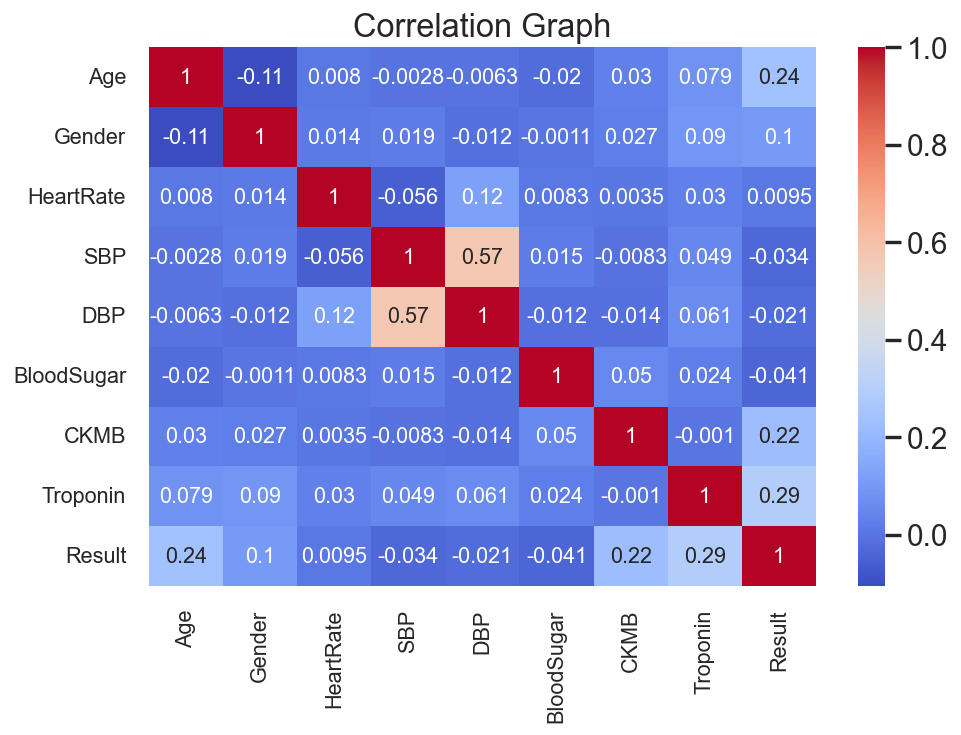

In [17]:
plt.figure(figsize=[8, 6], dpi=130)
plt.title("Correlation Graph", fontsize=18)
sns.heatmap(heart_df.corr(), annot=True, cmap="coolwarm", annot_kws={"fontsize": 12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Observations:
- Most of the features seem to have little to no relationship with the Result.

- CK-MB and Troponin have a high correlation with the Results, which is expected as these two features are commonly used to detect or confirm the occurrence of a heart attack. Higher levels of CK-MB and Troponin in the blood can indicate a greater likelihood of a heart attack or recent heart damage.

- Interestingly, age is the most influential factor in heart attack cases.

- Systolic blood pressure (SBP) highly correlates with diastolic blood pressure (DBP).

# Building ML Model

## Scaling the Dataset

Before scaling, we'll first take a look at how skewed the features are.

In [18]:
heart_df.skew(axis = 0)

Age          -0.257156
Gender       -0.680547
HeartRate     0.825814
SBP           0.558241
DBP           0.173616
BloodSugar    1.753993
CKMB          4.953110
Troponin      4.098477
Result       -0.450532
dtype: float64

In [19]:
normal = ['Age','HeartRate', 'SBP', 'DBP', 'BloodSugar', 'Troponin', 'CKMB', 'Result']

for col in normal:
    heart_df[col] = MinMaxScaler().fit_transform(heart_df[[col]])
heart_df.head(5)

,Age,Gender,HeartRate,SBP,DBP,BloodSugar,CKMB,Troponin,Result
0,0.394366,1,1.000000,0.221477,0.328358,0.159314,0.315234,0.000511,1.0
1,0.676056,1,1.000000,0.221477,0.328358,0.149510,0.847837,0.004089,1.0
2,0.633803,1,1.000000,0.221477,0.328358,0.311275,0.024523,0.004089,1.0
3,0.563380,1,0.989899,0.308725,0.462687,0.313725,0.009207,0.004089,1.0
4,0.605634,1,0.989899,0.308725,0.462687,0.237745,0.146353,0.010905,1.0


We chose the MinMax scaler for the features since it works best when the scale of the feature values is known and stable. The MinMax scaler also keeps the original distribution's shape and the relationships between the data points.

Good. We have successfully scaled the data. Now lets look into the feature selection.

## Feature Selection

In [20]:
# Independent variables
X = heart_df[['Age', 'Gender', 'HeartRate', 'SBP', 'DBP', 'BloodSugar', 'CKMB', 'Troponin']]

# Dependent variables
y = heart_df["Result"]

## Train/Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0, stratify=y)
print('X_Train:', X_train.shape)
print('X_Test:', X_test.shape)
print('y_Train:', y_train.shape)
print('y_Test:', y_test.shape)

X_Train: (1016, 8)
X_Test: (255, 8)
y_Train: (1016,)
y_Test: (255,)


# Logistic Regression (LR)
We used the following parameters:
<ol>
    <li> lr = LogisticRegression(C=1, solver='lbfgs') </li>
    <li> lr = LogisticRegression(C=100, solver='lbfgs') </li>
    <li> lr = LogisticRegression(C=1e5, solver='lbfgs') </li>
    <li> lr = LogisticRegression(C=1e10, solver='lbfgs') </li>
    <li> lr = LogisticRegression(C=1e100, solver='lbfgs') </li>
    <li> lr = LogisticRegression(C=1e5, solver='saga', max_iter=1000) </li>
</ol>

We chose to select parameters with different characteristics since we tried a number of them.

## Classification Report & Cross-Validation Score - LR

### Hyperparameters 1

In [22]:
lr1 = LogisticRegression(C=1, solver='lbfgs')
lr1.fit(X_train, y_train)

y_predict_lr1 = lr1.predict(X_test)
print(classification_report(y_test, y_predict_lr1))

score_lr1 = cross_val_score(lr1, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_lr1*100)

              precision    recall  f1-score   support

         0.0       0.70      0.51      0.59       100
         1.0       0.73      0.86      0.79       155

    accuracy                           0.72       255
   macro avg       0.71      0.68      0.69       255
weighted avg       0.72      0.72      0.71       255

Cross-Validation Score: 71.99073645206114


### Hyperparameters 2

In [23]:
lr2 = LogisticRegression(C=1e5, solver='lbfgs')
lr2.fit(X_train, y_train)

y_predict_lr2 = lr2.predict(X_test)
print(classification_report(y_test, y_predict_lr2))

score_lr2 = cross_val_score(lr2, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_lr2*100)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       100
         1.0       0.95      0.95      0.95       155

    accuracy                           0.95       255
   macro avg       0.94      0.94      0.94       255
weighted avg       0.95      0.95      0.95       255

Cross-Validation Score: 94.72996757758222


### Hyperparameters 3

In [24]:
lr3 = LogisticRegression(C=1e5, solver='saga', max_iter=1000)
lr3.fit(X_train, y_train)

y_predict_lr3 = lr3.predict(X_test)
print(classification_report(y_test, y_predict_lr3))

score_lr3 = cross_val_score(lr3, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_lr3*100)

c:\Users\alisu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       100
         1.0       0.89      0.86      0.88       155

    accuracy                           0.85       255
   macro avg       0.85      0.85      0.85       255
weighted avg       0.86      0.85      0.86       255



c:\Users\alisu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\alisu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\alisu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\alisu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-Validation Score: 87.33395090319593


c:\Users\alisu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Observations:
- Overall, Hyperparameters 2 (HP2) has the highest accuracy, precision and recall score compared to the other two.

- With a score of 95%, HP2 is the most accurate, followed by HP3 (87%), and HP1 (72%).

- Additionally, HP2 has a very high f1-score (for heart attack cases) of 95%, which means that 95% of all patients who experienced a heart attack would be correctly identified. For HP1 and HP3, this percentage is 79% and 88%, respectively.

- In LR, outliers have a major impact on the model's performance. Extreme values in the data can have an impact on the coefficients and negatively hinder the model's performance.

- HP3 also seems to have convergence issues.

Therefore, we will proceed with hyperparameters 2.

### Paraneter Tuning - LR
- Increasing the value of C has proven to be beneficial for the heart attack dataset LR model, particularly because the dataset contains a lot of noise and complexity. This is reflected in the significantly improved accuracy scores obtained between HP1 and HP2.

- We chose the solver='lbfgs' for this model mainly because it is recommended for datasets that are small to medium-sized, such as the heart_df dataset. This solver uses an efficient optimization approach and does not require a lot of memory compared to other solvers. Although the 'saga' solver in HP3 was having convergence issues and was not suitable for the small heart attack dataset, we still tried different solutions to address this problem.

### Classification Report & Cross-Validation Score - LR

In [25]:
lr = LogisticRegression(C=1e5, solver='lbfgs')
lr.fit(X_train, y_train)

y_predict_lr = lr.predict(X_test)
print(classification_report(y_test, y_predict_lr))

score_lr = cross_val_score(lr, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_lr*100)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       100
         1.0       0.95      0.95      0.95       155

    accuracy                           0.95       255
   macro avg       0.94      0.94      0.94       255
weighted avg       0.95      0.95      0.95       255

Cross-Validation Score: 94.72996757758222


### Observation:
- A high cross-validation score of approximately 95%. This is a good indication that the model is able to generalize well on new/unseen data.

- The model seems be reliable and can be used for making accurate predictions.

### Confusion Matrix - LR

<Axes: >

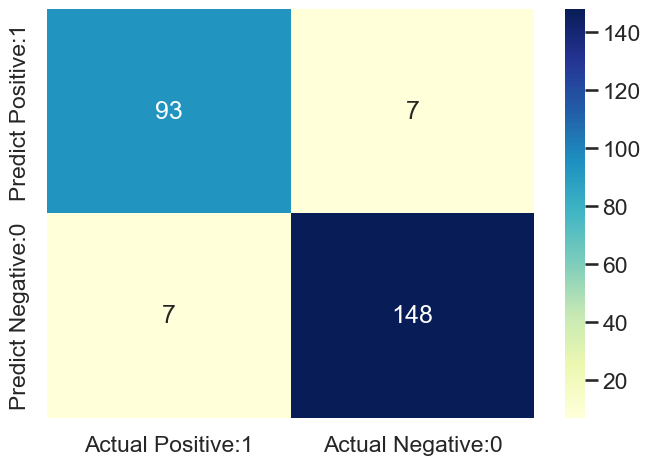

In [26]:
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_predict_lr)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Observation:
- Has a low false negative instances, which is crucial since it may be fatal to declare someone who had a heart attack to be healthy.

- The model predicted an equal number of false positives and false negatives.

- The model correctly categorised 241 patients, and missclassified only 14 individuals.

## Support Vector Classifier (SVC)

We used the following parameters:
<ol>
    <li>svc = SVC(kernel="poly", C=1, coef0=1, degree=1)</li>
    <li>svc = SVC(kernel="poly", C=1, coef0=1, degree=2)</li>
    <li>svc = SVC(kernel="poly", C=5, coef0=1, degree=3)</li>
    <li>svc = SVC(kernel="poly", C=10, coef0=5, degree=3)</li>
    <li>svc = SVC(kernel="poly", C=20, coef0=10, degree=4)</li>
    <li>svc = SVC(kernel="poly", C=30, coef0=20, degree=5)</li>
    <li>svc = SVC(kernel="rbf", C=1, gamma=5)</li>
    <li>svc = SVC(kernel="rbf", C=20, gamma=1)</li>
</ol>

### Hyperparameters 1

In [27]:
svc1 = SVC(kernel="poly",  C=1, coef0=1, degree=2)
svc1.fit(X_train, y_train)

y_predict_svc1 = svc1.predict(X_test)
print(classification_report(y_test, y_predict_svc1))

score_svc1 = cross_val_score(svc1, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_svc1*100)

              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74       100
         1.0       0.84      0.81      0.82       155

    accuracy                           0.79       255
   macro avg       0.78      0.78      0.78       255
weighted avg       0.79      0.79      0.79       255

Cross-Validation Score: 76.47522000926355


### Hyperparameters 2

In [28]:
svc2 = SVC(kernel="rbf",  C=1, gamma=5)
svc2.fit(X_train, y_train)

y_predict_svc2 = svc2.predict(X_test)
print(classification_report(y_test, y_predict_svc2))

score_svc2 = cross_val_score(svc2, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_svc2*100)

              precision    recall  f1-score   support

         0.0       0.65      0.55      0.59       100
         1.0       0.74      0.81      0.77       155

    accuracy                           0.71       255
   macro avg       0.69      0.68      0.68       255
weighted avg       0.70      0.71      0.70       255

Cross-Validation Score: 71.04832484174773


### Hyperparameters 3

In [29]:
svc3 = SVC(kernel="poly", C=20, coef0=10, degree=4)
svc3.fit(X_train, y_train)

y_predict_svc3 = svc3.predict(X_test)
print(classification_report(y_test, y_predict_svc3))

score_svc3 = cross_val_score(svc3, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_svc3*100)

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       100
         1.0       0.93      0.95      0.94       155

    accuracy                           0.93       255
   macro avg       0.93      0.92      0.93       255
weighted avg       0.93      0.93      0.93       255

Cross-Validation Score: 92.60923266944573


### Observation:
- HP1 & HP3 use Polynomial Kernel (different C and degree values) and HP2 uses the RBF Kernel.

- HP3 seems to have the highest accuracy score at 93% (slightly worse than LR), followed by HP1 at 76% and HP2 at 71%.

- HP3 also outperforms the other two when it comes to precision and recall scores.

- For patients who suffered from heart attacks, the f1-score for HP3 is 94%, followed by HP1 (82%), and HP2 (again, placing last) at 77%.

### Parameter Tuning - SVC (Poly)
- A high value of C (C=20) indicates that the model will penalise misclassification more severely, which is crucial in accurately determining the likelihood of patients experiencing heart attacks. However, because the decision boundary fits the training data set so much better, it may increase the possibility of overfitting.

- Setting coef0 to 10 means that higher-order terms in the polynomial kernel will be given more emphasis relative to lower-order terms. This can make the decision boundary more flexible and record more complex relationships between features and the outcome. Nevertheless, increasing the coefficient may increase the risk of overfitting the model.
 
- In SVM Poly, increasing the degree parameter to 4 enables the development of a more sophisticated decision boundary that is better able to capture non-linear relationships between the features and the target variable. Improved model performance can be the consequence, especially when the underlying data is complicated and has non-linear separability.

### Classification Report & Cross-Validation Score - SVC (Poly)

In [30]:
svc = SVC(kernel="poly", C=20, coef0=10, degree=4)
svc.fit(X_train, y_train)

y_predict_svc = svc.predict(X_test)
print(classification_report(y_test, y_predict_svc))

score_svc = cross_val_score(svc, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_svc*100)

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       100
         1.0       0.93      0.95      0.94       155

    accuracy                           0.93       255
   macro avg       0.93      0.92      0.93       255
weighted avg       0.93      0.93      0.93       255

Cross-Validation Score: 92.60923266944573


### Observation:
- Again, the model returns a high cross-validation score of just under 93% (slightly worse than LR). This is a good indication that the model is able to generalize well on new/unseen data. 

- Compared to individuals who have not experienced a heart attack (f1-score: 91%), the model is more likely to correctly forecast postive heart rate instances (f1-score: 94%).

- The model also seems be reliable and can be used for making accurate predictions.

### Why use SVC (Poly)?
- Using SVC (Poly) could be beneficial because it can capture non-linear relationships in the data. In many real-world applications like the heart attack dataset, the decision boundary between classes is non-linear, and SVC Poly can better capture these non-linear relationships.

- However, it is also important to note that using a higher degree polynomial could be overfitting and increasing it more can lead to a decrease in generalization performance.

- SVC (Poly) is recognized as less vulnerable to overfitting than SVC (RBF), particularly when dealing with high-dimensional feature spaces. The polynomial kernel constrains the flexibility of the decision boundary, which prevents it from excessively bending to accommodate the noise in the data.

### Why use SVC (RBF)?
- SVC (Poly) may not perform as well as SVC (RBF) for some problems, such as those with highly non-linear decision boundaries or with a large number of irrelevant features/features with low correlation to the target column. In our case, 'Result' column has low correlation with most features in the dataset.

In this dataset, SVC (Poly) seems to perform much better than RBF.

### Confusion Matrix - SVC (Poly)

<Axes: >

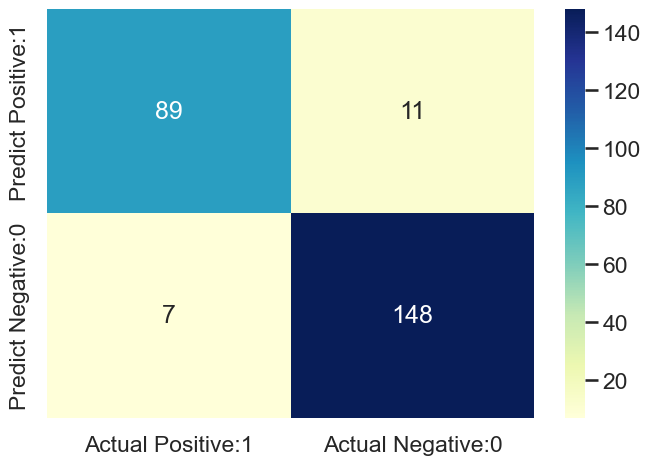

In [31]:
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_predict_svc)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Observation:
- 7 people who actually had heart attacks were misdiagnosed by the model, which is still not ideal.

- The model incorrectly predicted more false positives than false negatives.

- SVC (Poly) has the same number of true negatives and LR and their confusion matrices are quite similar.

- Overall, SVM (Poly) performs slightly worse than LR.

# Random Forest

All parameters used:
<ol>
    <li>RandomForestClassifier(n_estimators=1, random_state=0)</li>
    <li>RandomForestClassifier(n_estimators=75, random_state=0)</li>
    <li>RandomForestClassifier(n_estimators=150, random_state=0)</li>
</ol>

### Classification Report & Cross-Validation Score - RF

### Hyperparameters 1

In [32]:
rf1 = RandomForestClassifier(n_estimators=1, random_state=0)
rf1.fit(X_train, y_train)

y_predict_rf1 = rf1.predict(X_test)
print(classification_report(y_test, y_predict_rf1))

score_rf1 = cross_val_score(rf1, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_rf1*100)

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       100
         1.0       0.96      0.95      0.96       155

    accuracy                           0.95       255
   macro avg       0.95      0.95      0.95       255
weighted avg       0.95      0.95      0.95       255

Cross-Validation Score: 92.13555658483867


### Hyperparameters 2

In [33]:
rf2 = RandomForestClassifier(n_estimators=75, random_state=0)
rf2.fit(X_train, y_train)

y_predict_rf2 = rf2.predict(X_test)
print(classification_report(y_test, y_predict_rf2))

score_rf2 = cross_val_score(rf2, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_rf2*100)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       100
         1.0       0.99      1.00      1.00       155

    accuracy                           1.00       255
   macro avg       1.00      0.99      1.00       255
weighted avg       1.00      1.00      1.00       255

Cross-Validation Score: 97.87895630693222


### Hyperparameters 3

In [34]:
rf = RandomForestClassifier(n_estimators=150, random_state=0)
rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_test)
print(classification_report(y_test, y_predict_rf))

score_rf = cross_val_score(rf, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_rf*100)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       100
         1.0       0.99      1.00      1.00       155

    accuracy                           1.00       255
   macro avg       1.00      0.99      1.00       255
weighted avg       1.00      1.00      1.00       255

Cross-Validation Score: 98.50640728732438


### Observation:
- HP3 has the best performance here with a cross-validation score of 99% a big improvement compared with HP1 (92%).

- Increasing the number of estimators in the RF model resulted in improved accuracy and F1 scores above 96%.

- However, increasing the number of estimators beyond 75 does not show any more improvements in performance.

- The extremely high accuracy scores could indicate that the model is overfitting the data. This is a common issue with RF models, especially when the dataset is imbalanced, as is the case with the heart attack dataset where 60% of the cases are negative and male patients are twice as large as females.

Therefore, We will proceed with HP3.

### Why use Random Forest?
- RF could be a useful algorithm to use with a heart attack dataset due to its capability to handle high-dimensional datasets with multiple features, particularly when there are complex and nonlinear relationships between the features and target variable. 

- Additionally, RF is less likely to overfit compared to other ML methods like decision trees, as it can combine outputs from multiple trees and reduce model variance.


### Confusion Matrix - RF

<Axes: >

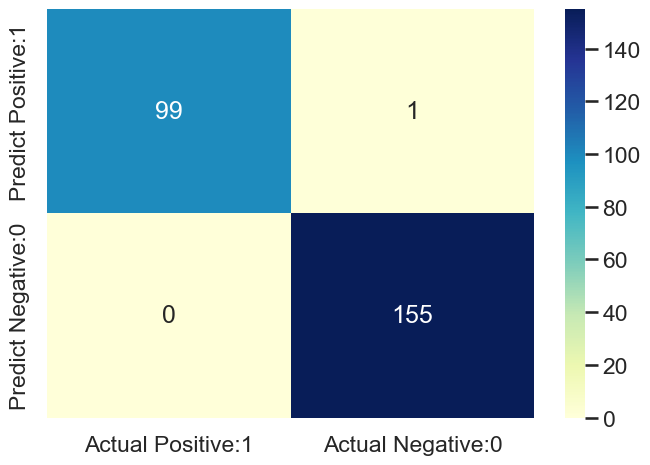

In [35]:
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_predict_rf)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Observation:
- RF had the best performance among the tested models so far, achieving an impressive accuracy score of 99% on the testing set, with only one negative case being incorrectly labelled as positive.

- This model is ideal for medical applications since it has no false negatives. It accurately identified all patients from the test set who had suffered or were currently suffering from a heart attack, without misclassifying any as negative. 

# Voting Classifier - Hard Voting

Combining the previous 3 models using a Hard Voting Classifier (HVC) model.

In [36]:
vc = VotingClassifier(estimators=[ ('rf', rf), ('lr', lr), ('svc', svc)], voting='hard')
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=150,
                                                     random_state=0)),
                             ('lr', LogisticRegression(C=100000.0)),
                             ('svc',
                              SVC(C=20, coef0=10, degree=4, kernel='poly'))])

### Classification Report & Cross-Validation Score - HVC

In [37]:
y_predict_vc = vc.predict(X_test)
print(classification_report(y_test, y_predict_vc))
score_vc = cross_val_score(vc, X, y, cv = 5, scoring='accuracy').mean()
print("Cross-Validation Score:", score_vc*100)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       100
         1.0       0.97      0.99      0.98       155

    accuracy                           0.97       255
   macro avg       0.97      0.97      0.97       255
weighted avg       0.97      0.97      0.97       255

Cross-Validation Score: 96.38227574494366


### Observation:
- HVC achieved an impressive cross-validation accuracy of 97% and f1-scores just under 100%. This means that our model can accurately predict 97% of all patients who may or may not suffer from a heart attack.

- Additionally, among patients who have suffered from a heart attack, our model can accurately predict their condition 98% of the time based on features such as age, CK-MB, Troponin, and more.

- Despite the RF model being prone to overfitting, the HVC was able to leverage the strengths of all three models to create an overall better predicting model.

### Why use Hard Voting Classifier?
- HVC is a technique that combines predictions from multiple models, leading to better performance and lower overfitting risk.

- Combining the strengths of SVC (Poly), LR, and RF can potentially result in a more robust and accurate model.

- Using different models with distinct advantages like SVC (Poly) for non-linear relationships, LR for categorical features, and RF for complex and high-dimensional datasets can capture different aspects of the dataset.

### Confusion Matrix - HVC

<Axes: >

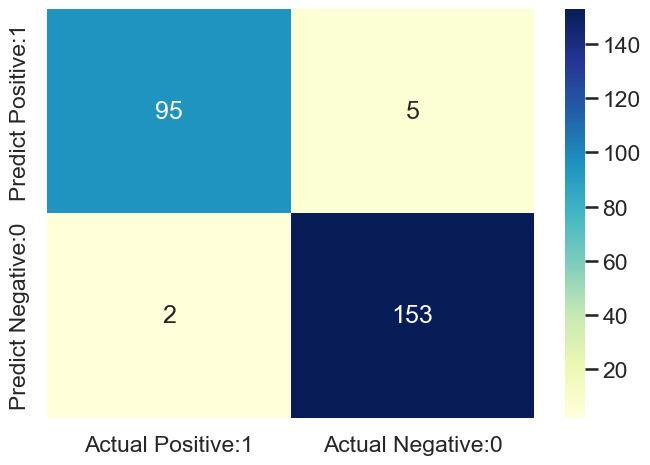

In [38]:
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_predict_vc)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Observation:
- When combining the strengths of all three models, achieved an overall accuracy of 97%. That is slightly lower than RF.

- The model exhibits superior performance to LR and SVC (Poly) with fewer false positives and false negatives. However, compared to RF, it has a slightly higher misclassification rate, with a total of 7 cases misclassified (including 2 false negative) as opposed to RF's 1 misclassified case (a false postive).

# Conclusion
- We first started imported the data, analysed it, and then pre-processed the data by removing outliers, converting the  target variable (Result) into an integer boolean value, and normalising data using MinMax scaler.

- Next, we performed a 80/20 train/test split on the data as it worked best for our models in terms of performance.

- We then proceeded with training and testing 4 tuned models: LR, SVC (Poly), RF and then HVC (Combines LR, SVC (Poly), and RF).

- We also tried several combinations of hyperparameters for each model using a trial and error approach. This involved testing various combinations of hyperparameters to determine the best set for each model. We did this to ensure that our models were performing at their optimal levels and to achieve the highest accuracy possible.

- The results shows us that the RF model surpassed all other models with an accuracy score of 99%. The HVC came in second with an accuracy of 97%, outperforming both the LR and SVC, which had scores of 95% and 93%, respectively. 

- In terms of misclassifications, RF outperformed all models again, and only has one false negative misclassification, which is not as serious as false positives. HVC, on the other hand, finished in second with seven misclassifications, two of which were false positives. LR came next with 14 misclassifications, while SVM (Poly) came last with 18 misclassifications. 

# Reference

- NHS Choices (2023) What is blood pressure?2023 [online]. Available from: https://www.nhs.uk/common-health-questions/lifestyle/what-is-blood-pressure/ [Accessed 1 May 2023]. 

- CDC (2021) High Blood Pressure Symptoms and Causes Centers for Disease Control and Prevention.18 May 2021 [online]. Available from: https://www.cdc.gov/bloodpressure/about.htm [Accessed 30 April 2023].

- Rahul Kurapati and Soos, M.P. (2022) CPK-MB Nih.gov.21 April 2022 [online]. StatPearls Publishing. Available from: https://www.ncbi.nlm.nih.gov/books/NBK557591/ [Accessed 30 April 2023].

‌